In [42]:
def CRRA(cons,γ):
    """
    "機能の説明を書くスペース"
    効用関数を計算(この関数はどう使うのか。目的や使いみちを書いておく。)
    
    ### インプット(書かなくても機能上は問題ないけど、ヘルプにインプットとアウトプットの情報が書いてあったほうが便利)
    `cons::Real` 消費,
    `γ::Real` 相対的リスク回避度
    ### アウトプット(同上)
    効用
    """
    if γ != 1.0: # 条件分岐の際も:(コロン)を条件文の後に書く
        return cons**(1.0 - γ) / (1.0 - γ)
    else:
        return np.log(cons)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# パラメータはここで設定をする
β = 0.985**30
γ = 2.0
rent = 1.025**30 - 1.0
# added
wH = 1.0
wL = 0.1
p = 0.5

nw = 10 
w_max = 1.0
w_min = 0.1
na = 400
a_max = 1.0
a_min = -0.1 #0.025

grid_w = np.linspace(w_min,w_max,nw)
grid_a = np.linspace(a_min,a_max,na)

In [44]:
# 配列(変数)をあらかじめ定義しておく
obj = np.zeros((na, nw)) # 目的関数

# あらゆる(w,a)の組み合わせについて生涯効用を計算

for i in range(nw):
    for j in range(na):
        
#        cons = grid_w[i] - grid_a[j]
        c1 = grid_w[i] - grid_a[j]
        
        if c1 > 0.0:
            c2H = (1.0+rent)*grid_a[j] + wH
            c2L = (1.0+rent)*grid_a[j] + wL
            # obj[j,i] = CRRA(c1, γ) + β*p*CRRA(c2H, γ) + β*(1-p)*CRRA(c2L, γ)

            if c2L > 0.0:
                obj[j,i] = CRRA(c1, γ) + β*p*CRRA(c2H, γ) + β*(1-p)*CRRA(c2L, γ)
            else:
                obj[j,i] = -10000.0

        else:
            # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
            obj[j,i] = -10000.0

In [47]:
pol = np.zeros(nw) # 政策関数

# 各wについて生涯効用を最大とするようなaを探す
for i in range(nw):

    maxl = np.argmax(obj[:,i]) # 最大値がある場所を探す
    maxv = obj[maxl,i] # そのmaximizerから最大値を求める

    # policy：最適貯蓄
    pol[i] = grid_a[maxl]

print(pol)

[-0.00626566  0.02130326  0.05162907  0.07919799  0.10952381  0.13984962
  0.17017544  0.20050125  0.23082707  0.26390977]


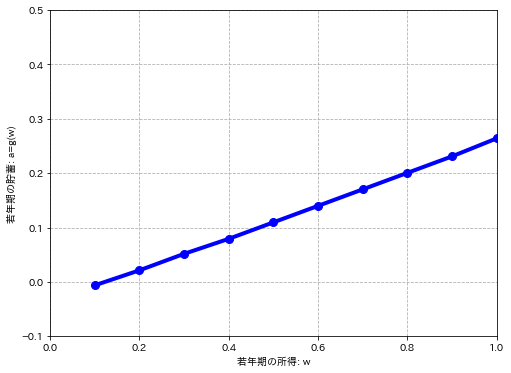

In [46]:
# 図2.1(b)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(grid_w, pol, c="b", marker="o", lw=4, ms=8)
ax.set(xlabel="若年期の所得: w", ylabel="若年期の貯蓄: a=g(w)", xlim=(0,1), ylim=(-0.1,0.5))
ax.grid(ls="--")
plt.show()